In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,Birch
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,davies_bouldin_score
DBSCAN

sklearn.cluster._dbscan.DBSCAN

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(200, 5)

In [11]:
df=df.drop("CustomerID",axis=1)

In [12]:
numerical_arr=[df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)']]

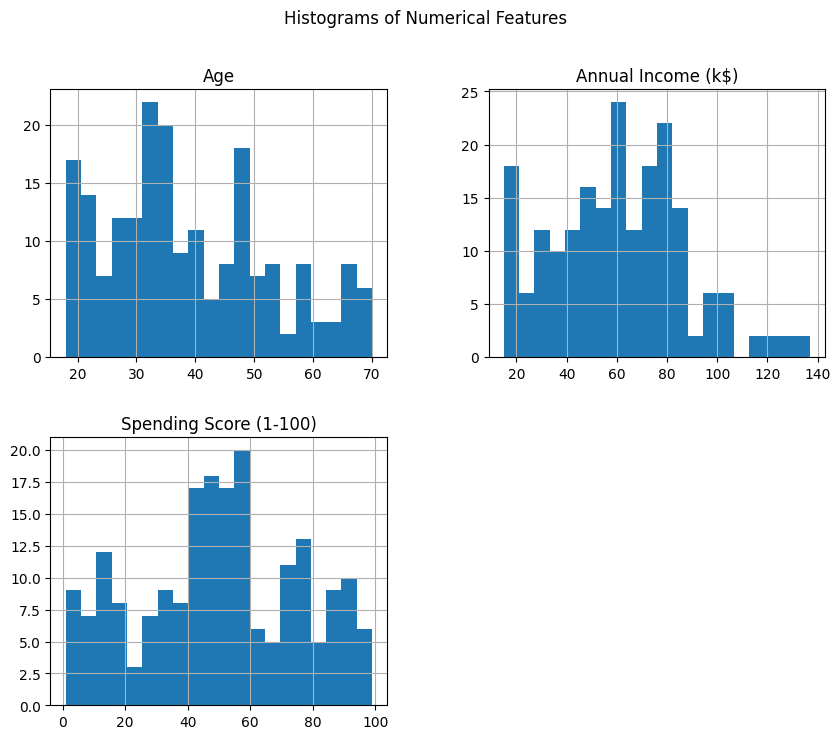

In [13]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].hist(bins=20,figsize=(10,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

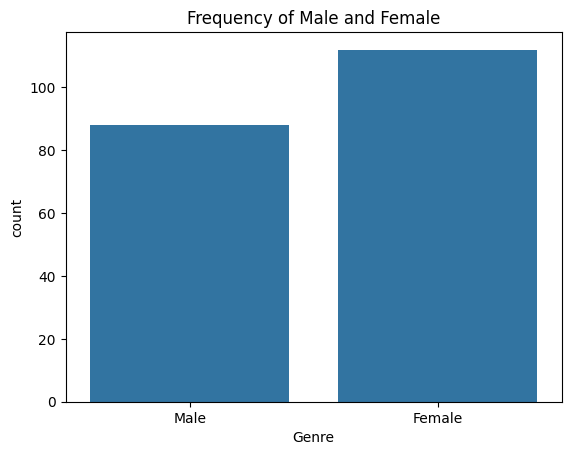

In [14]:
sns.countplot(x="Genre",data=df)
plt.title("Frequency of Male and Female")
plt.show()

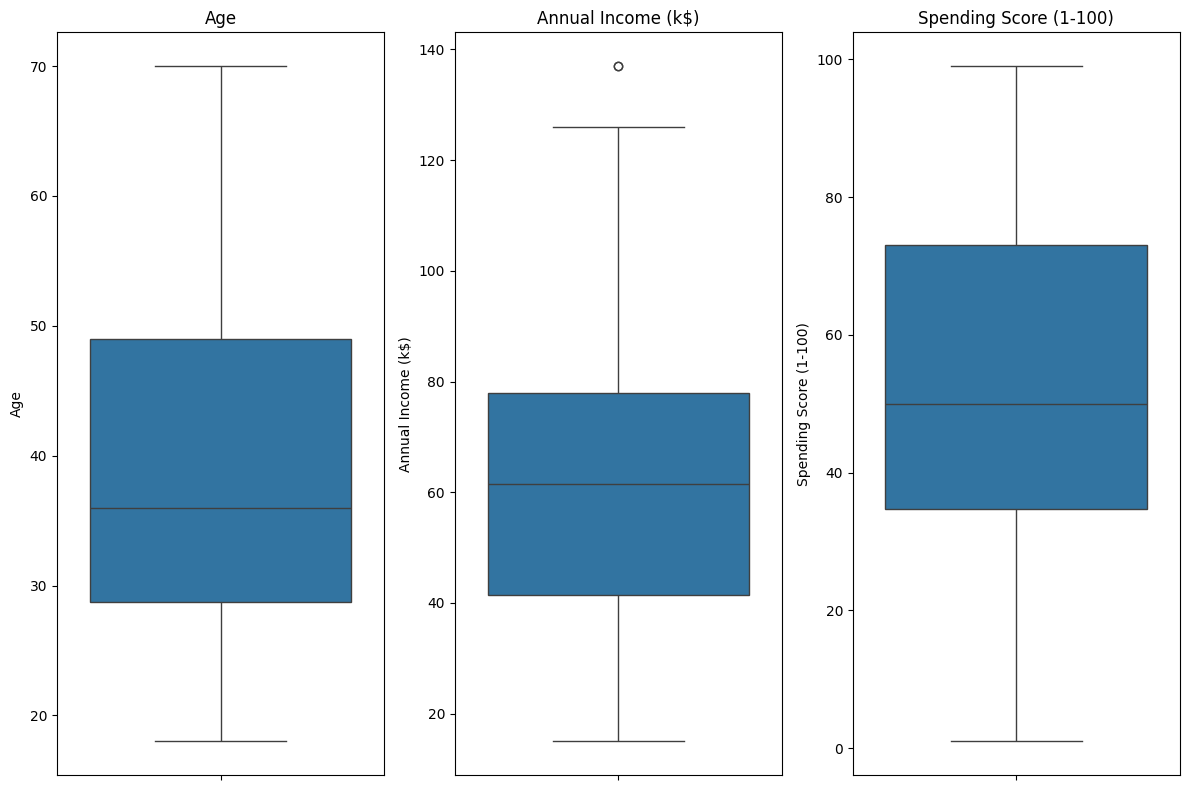

In [15]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

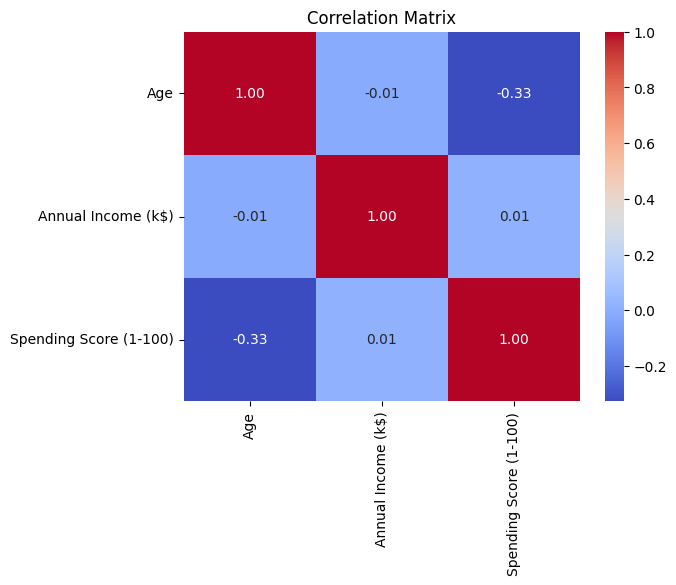

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [17]:
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])
df['Genre']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64

In [ ]:
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].max())
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].min())

Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99
dtype: int64
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64


In [19]:
numerical_arr=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for num in numerical_arr:
    Q1 = df[num].quantile(0.25)
    Q3 = df[num].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df= df[(df[num] >= lower_bound) & (df[num] <= upper_bound)]

In [20]:
X=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [22]:
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].max())
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].min())

Age                        70
Annual Income (k$)        126
Spending Score (1-100)     99
dtype: int64
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64


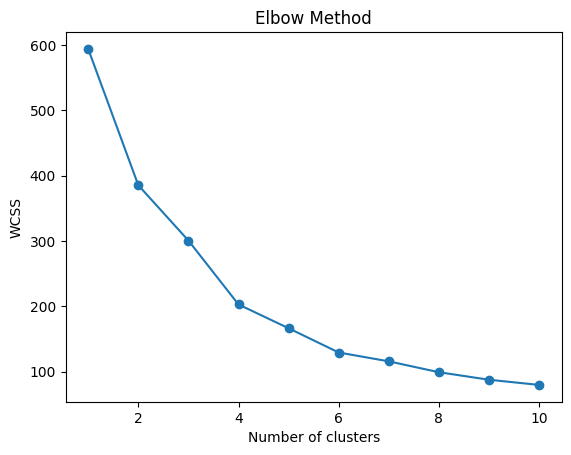

In [23]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans_model=KMeans(n_clusters=4,random_state=42)
kmeans_model_result=kmeans_model.fit(df)

In [25]:
df['KMeans_Cluster'] = kmeans_model_result.labels_
avg_spending_per_cluster = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per KMeans Cluster:")
print(avg_spending_per_cluster)

Average Spending Score per KMeans Cluster:
KMeans_Cluster
0    42.631579
1    82.105263
2    74.250000
3    18.648649
Name: Spending Score (1-100), dtype: float64


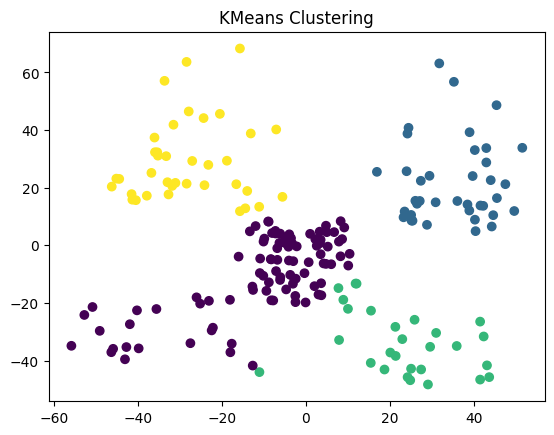

In [26]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_model_result.labels_)
plt.title("KMeans Clustering")
plt.show()

In [27]:
agglomerativeClustering_model=AgglomerativeClustering(n_clusters=4)
agglomerativeClustering_model_result=agglomerativeClustering_model.fit(df)

In [37]:
df['Agglo_Cluster'] = agglomerativeClustering_model_result.labels_
avg_spending_per_agglo = df.groupby('Agglo_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Agglomerative Cluster:")
print(avg_spending_per_agglo)

Average Spending Score per Agglomerative Cluster:
Agglo_Cluster
0    43.776699
1    82.105263
2    18.648649
3    81.000000
Name: Spending Score (1-100), dtype: float64


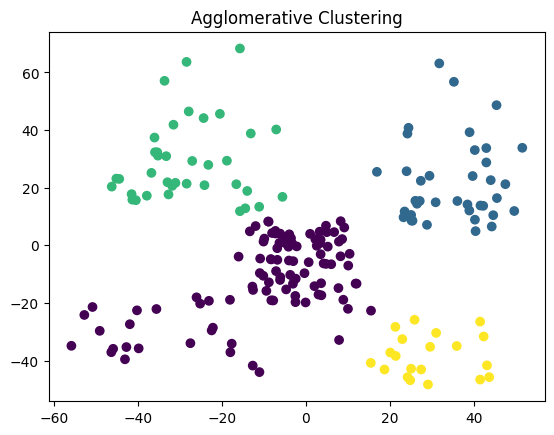

In [28]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agglomerativeClustering_model_result.labels_)
plt.title("Agglomerative Clustering")
plt.show()

In [29]:
DBSCAN_model = DBSCAN(eps=0.5, min_samples=5)
DBSCAN_model_result = DBSCAN_model.fit(df)

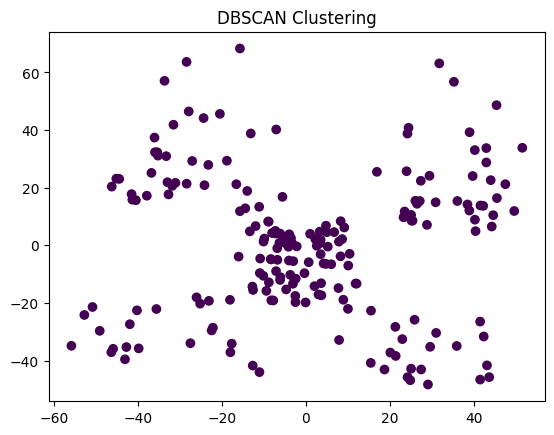

In [30]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=DBSCAN_model_result.labels_)
plt.title("DBSCAN Clustering")
plt.show()

In [31]:
Brich_model=Birch(n_clusters=4)
Brich_model_result=Brich_model.fit(df)

In [39]:
df['Birch_Cluster'] = Brich_model_result.labels_
avg_spending_per_birch = df.groupby('Birch_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Birch Cluster:")
print(avg_spending_per_birch)

Average Spending Score per Birch Cluster:
Birch_Cluster
0    43.776699
1    82.105263
2    18.648649
3    81.000000
Name: Spending Score (1-100), dtype: float64


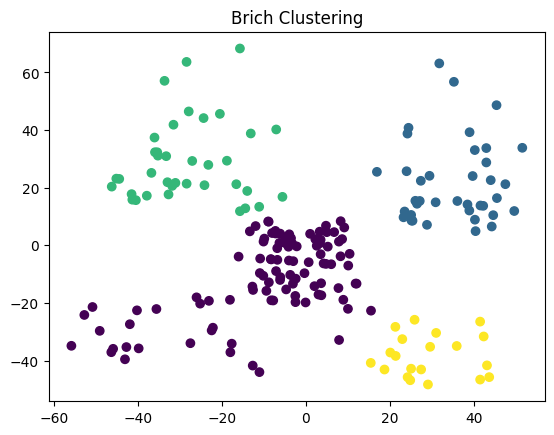

In [32]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=Brich_model_result.labels_)
plt.title("Brich Clustering")
plt.show()

In [33]:
GaussianMixture_model=GaussianMixture(n_components=4,random_state=42)
GaussianMixture_model_result=GaussianMixture_model.fit_predict(df)

In [38]:
df['GMM_Cluster'] = GaussianMixture_model_result
avg_spending_per_gmm = df.groupby('GMM_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Gaussian Mixture Cluster:")
print(avg_spending_per_gmm)

Average Spending Score per Gaussian Mixture Cluster:
GMM_Cluster
0    42.631579
1    82.105263
2    74.250000
3    18.648649
Name: Spending Score (1-100), dtype: float64


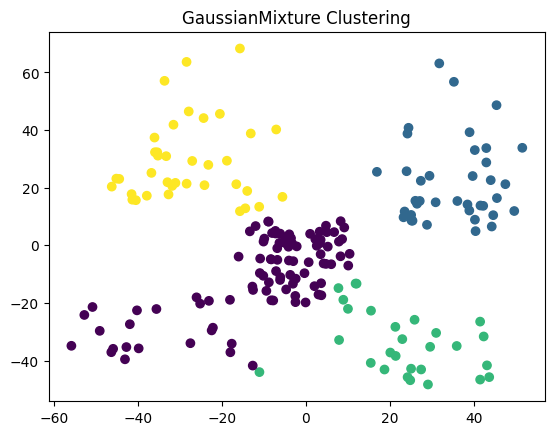

In [34]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=GaussianMixture_model_result)
plt.title("GaussianMixture Clustering")
plt.show()

In [35]:
print(f'kMeans silhouette score: {silhouette_score(df, kmeans_model_result.labels_)}')
print(f'AgglomerativeClustering silhouette score: {silhouette_score(df, agglomerativeClustering_model_result.labels_)}')
#print(f'DBSCAN silhouette score: {silhouette_score(df, DBSCAN_model_result.labels_)}')
print(f'Birch silhouette score: {silhouette_score(df, Brich_model_result.labels_)}')
print(f'GaussianMixture silhouette score: {silhouette_score(df, GaussianMixture_model_result)}')

kMeans silhouette score: 0.40842544573029993
AgglomerativeClustering silhouette score: 0.4139664340587716
Birch silhouette score: 0.4139664340587716
GaussianMixture silhouette score: 0.40842544573029993


In [ ]:
import joblib
joblib.dump(kmeans_model,"KMeans.pkl")
joblib.dump(agglomerativeClustering_model,"AgglomerativeClustering.pkl")
joblib.dump(Brich_model,"Brich.pkl")
joblib.dump(GaussianMixture_model,"GaussianMixture.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")